# Entregable 1 (RNN)
Por Carlos Sánchez Polo
Asignatura Deep Learning

## Enunciado:

Aplicación de SimpleRNN a:
1. Dataset IMDB de Keras (https://keras.io/api/datasets/imdb/),
2. Otro Dataset de Keras o TensorFlow (https://keras.io/api/datasets/, https://www.tensorflow.org/datasets/catalog/overviewhl=%20es#all_datasets)

In [ ]:
#!pip install tensorflow

In [13]:
import numpy as np
import pandas as pd
from keras.datasets import imdb
from keras.preprocessing import sequence


from keras import models
from keras import layers

In [18]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [19]:
maxlen = 1000
x_train = sequence.pad_sequences(train_data, maxlen=maxlen)
x_test = sequence.pad_sequences(test_data, maxlen=maxlen)

In [20]:
from keras import regularizers

max_words = 10000
embedding_dim = 32

# Definir el modelo
model = models.Sequential()
model.add(layers.Embedding(input_dim=max_words, output_dim=embedding_dim))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dense(1, activation='sigmoid'))

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [5]:
history = model.fit(x_train, 
                    train_labels, 
                    epochs=15,
                    batch_size=512, 
                    validation_split=0.2)
                    


Epoch 1/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - accuracy: 0.5028 - loss: 0.9377 - val_accuracy: 0.4936 - val_loss: 0.7904
Epoch 2/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 107ms/step - accuracy: 0.5518 - loss: 0.7188 - val_accuracy: 0.7906 - val_loss: 0.5374
Epoch 3/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - accuracy: 0.8326 - loss: 0.4846 - val_accuracy: 0.8372 - val_loss: 0.4380
Epoch 4/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - accuracy: 0.8849 - loss: 0.3740 - val_accuracy: 0.8720 - val_loss: 0.3808
Epoch 5/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 107ms/step - accuracy: 0.9130 - loss: 0.3174 - val_accuracy: 0.8742 - val_loss: 0.3640
Epoch 6/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - accuracy: 0.9232 - loss: 0.2973 - val_accuracy: 0.8824 - val_loss: 0.3509
Epoch 7/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step - accuracy: 0.9361 - loss: 0.2707 - val_accuracy: 0.8754 - val_loss: 0.3557
Epoch 8/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - accuracy: 0.9381 - loss: 0.2564 - val_accuracy: 0.

In [8]:
val_acc_train = history.history['accuracy']
val_acc_test = history.history['val_accuracy']

results = model.evaluate(x_test, test_labels)

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8762 - loss: 0.3579


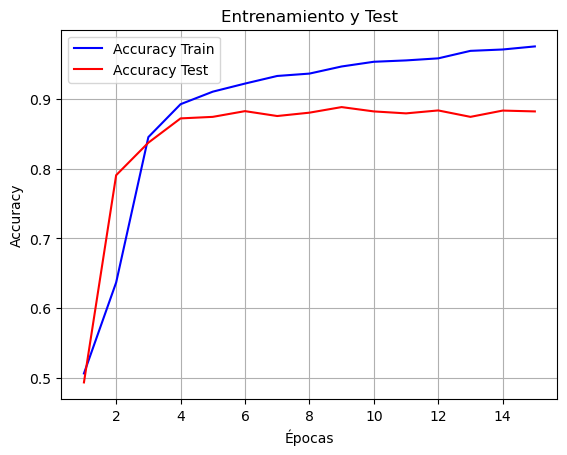

In [12]:
import matplotlib.pyplot as plt


epochs = range(1, len(val_acc_train) + 1)
plt.plot(epochs, val_acc_train, 'b', label='Accuracy Train')
plt.plot(epochs, val_acc_test, 'r',  label='Accuracy Test')
plt.title('Entrenamiento y Test')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.show()


## RNN con yelp_review_full_csv

In [57]:
path_train="yelp_review_full_csv/train.csv"
path_test="yelp_review_full_csv/test.csv"

# Cargar el 10% de las filas del archivo train.csv
train_data_2 = pd.read_csv(path_train).sample(frac=0.15, random_state=42)

# Separar características (data) y etiquetas (labels) para train
train_labels_2 = train_data_2.iloc[:, 0]  # La primera columna contiene las etiquetas
train_data_2 = train_data_2.iloc[:, 1]  # Las características están en todas las columnas excepto la primera

# Cargar el 10% de las filas del archivo test.csv
test_data_2 = pd.read_csv(path_test).sample(frac=0.15, random_state=42)

# Separar características (data) y etiquetas (labels) para test
test_labels_2 = test_data_2.iloc[:, 0]  # La primera columna contiene las etiquetas
test_data_2 = test_data_2.iloc[:, 1]  # Las características están en todas las columnas excepto la primera

# Verificar el tamaño de las muestras
print("Tamaño del conjunto de entrenamiento (data):", len(train_data_2))
print("Tamaño del conjunto de prueba (data):", len(test_data_2))
print("Tamaño del conjunto de entrenamiento (labels):", len(train_labels_2))
print("Tamaño del conjunto de prueba (labels):", len(test_labels_2))


Tamaño del conjunto de entrenamiento (data): 97500
Tamaño del conjunto de prueba (data): 7500
Tamaño del conjunto de entrenamiento (labels): 97500
Tamaño del conjunto de prueba (labels): 7500


In [58]:
from keras.utils import to_categorical

# Convertir train_labels_2 a one-hot encoding
train_labels_2_encoded = to_categorical(train_labels_2 - 1)

# Convertir test_labels_2 a one-hot encoding
test_labels_2_encoded = to_categorical(test_labels_2 - 1)


In [59]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Inicializa un Tokenizer
tokenizer = Tokenizer(num_words=40000)

# Ajusta el Tokenizer a tus datos de entrenamiento
tokenizer.fit_on_texts(train_data_2)

# Convierte los textos en secuencias de números enteros
train_data_2 = tokenizer.texts_to_sequences(train_data_2)
test_data_2 = tokenizer.texts_to_sequences(test_data_2)

# Ahora puedes aplicar sequence.pad_sequences
x_train_2 = sequence.pad_sequences(train_data_2, maxlen=maxlen)
x_test_2 = sequence.pad_sequences(test_data_2, maxlen=maxlen)

In [60]:
max_words = 40000
embedding_dim = 64
num_classes = 5

# Definir el modelo
model_2 = models.Sequential()
model_2.add(layers.Embedding(input_dim=max_words, output_dim=embedding_dim))
model_2.add(layers.Flatten())
model_2.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model_2.add(layers.Dense(num_classes, activation='softmax'))

# Compilar el modelo
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [61]:
history_2 = model_2.fit(x_train_2,
                        train_labels_2_encoded,
                        epochs=20,
                        batch_size=1024,
                        validation_data=(x_test_2, test_labels_2_encoded))


Epoch 1/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 44s 443ms/step - accuracy: 0.2065 - loss: 3.8174 - val_accuracy: 0.2008 - val_loss: 2.0691
Epoch 2/20
11/96 ━━━━━━━━━━━━━━━━━━━━ 35s 423ms/step - accuracy: 0.1958 - loss: 2.0541

KeyboardInterrupt: 

In [ ]:

val_acc_train_2 = history_2.history['accuracy']
val_acc_test_2 = history_2.history['val_accuracy']


In [ ]:

results_2 = model_2.evaluate(x_test_2, test_labels_2)

